![Titanic Image](https://mcdn.wallpapersafari.com/medium/37/71/qtAKe3.jpg)

## <center>RMS Titanic</center>
<center>Struck an iceberg 11:40 p.m. (ship's time) 14 April 1912 on her maiden voyage and sank 2 h 40 min later on 15 April 1912; 108 years ago.</center>

### Importing Libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Classification Algorithms
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score

### Loading Dataset

In [2]:
train = pd.read_csv(r"D:\Study\Trimester 8\DWDM\Mini Project\train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Checking for any missing or NaN values.

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
def transrepl(data, transformer, col_names):
    """
    This function takes three arguments:
    1. data: The dataframe on which we want to perform transformations.
    2. transormer: The transformer we want to use. (Note: Does not work for Onehot encoder).
    3. col_names: The columns on which we want to apply the transformations.

    It replaces the transformed data with the orginal data and returns the data frame.
    """
    clf= ColumnTransformer(transformers=[('transformer', transformer , col_names)])
    transformed_data = clf.fit_transform(data)
    data[col_names] = transformed_data
    return data

#### Filling the missing values using Iterative Imputer.

In [5]:
train = transrepl(train, IterativeImputer(), ['Age'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


#### Filling the missing values using SimpleImputer

In [6]:
train = transrepl(train, SimpleImputer(strategy='most_frequent'), ['Cabin', 'Embarked'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


#### Checking for any missing or NaN values.

In [7]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Visualizations

#### 1. Count plots for Family Size

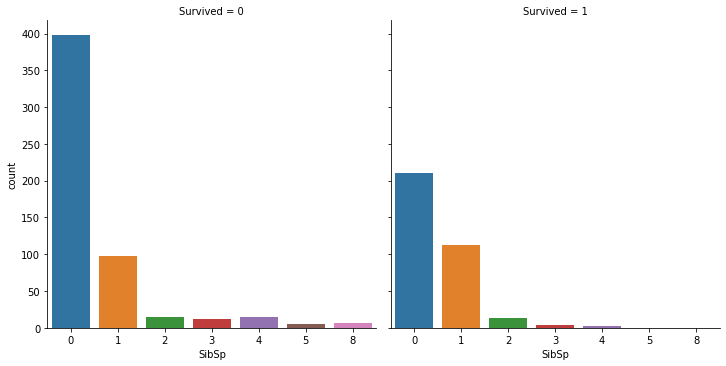

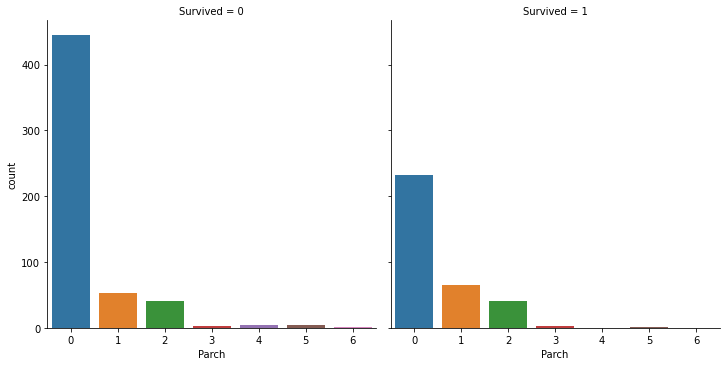

In [8]:
sns.catplot(x="SibSp", col = 'Survived', data=train, kind = 'count')
sns.catplot(x="Parch", col = 'Survived', data=train, kind = 'count')
plt.show()

Basically, the columns SibSp and Parch tell us whether the corresponding person was accompanied by anyone or not. So we will create a new column Is_alone which will tell us whether the person was accompanied (1) or not (0).

In [9]:
def  Is_alone(data):
    conditions = [
        ((data['SibSp'] + data['Parch'])  > 0),
        ((data['SibSp'] + data['Parch'])  == 0),
        ]
    values = [0, 1]
    data['Is_alone'] = np.select(conditions, values)
    return data

train = Is_alone(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1


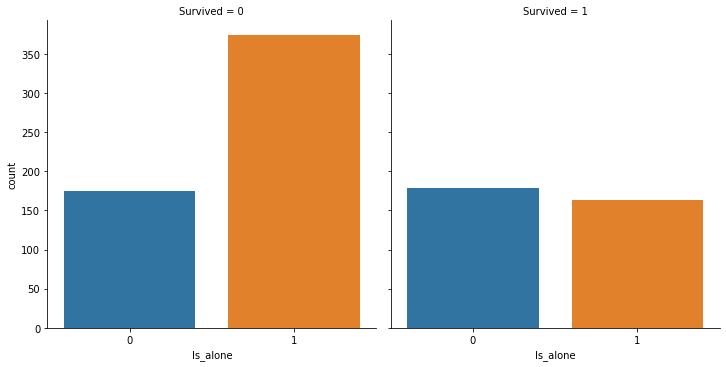

In [10]:
sns.catplot(x="Is_alone", col = 'Survived', data=train, kind = 'count', aspect=1)

#### Count plot for Sex

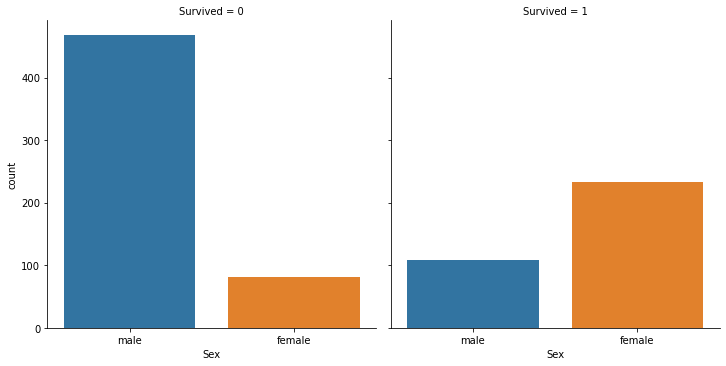

In [11]:
sns.catplot(x="Sex", col = 'Survived', data=train, kind = 'count')

Here, we derive a new attribute from old attributes. We will derive it from Age and Sex columns as follows.

In [12]:
def typeOfPerson(data):
    conditions = [
        (data['Age'] <= 15),
        (data['Age'] > 15) & (data['Sex'] == "male"),
        (data['Age'] > 15) & (data['Sex'] == "female")
        ]
    values = ['child', 'man', 'woman']
    data['typeOfPerson'] = np.select(conditions, values)
    return data

train = typeOfPerson(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_alone,typeOfPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1,woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,man


#### KDE plot for type of person

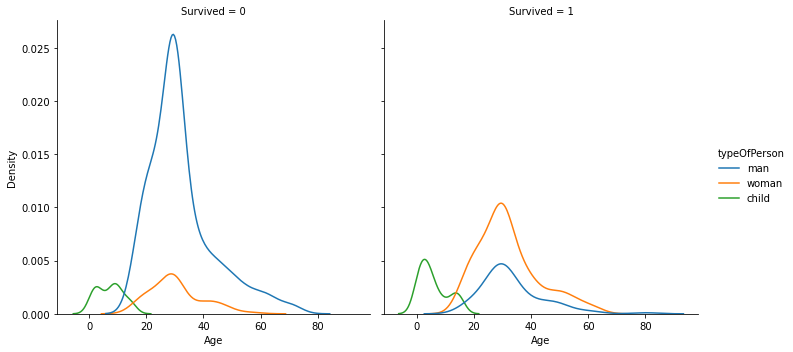

In [13]:
sns.displot(data=train, x="Age", hue="typeOfPerson", col="Survived", kind="kde")

#### Bar plot for Passenger Class

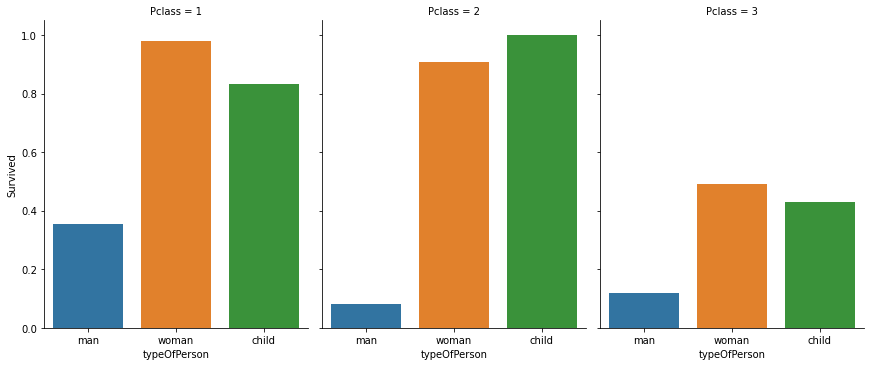

In [14]:
sns.catplot(data=train, x="typeOfPerson", y="Survived", col="Pclass", kind="bar", ci=None, aspect=0.8)

#### Bar plot for Embarked

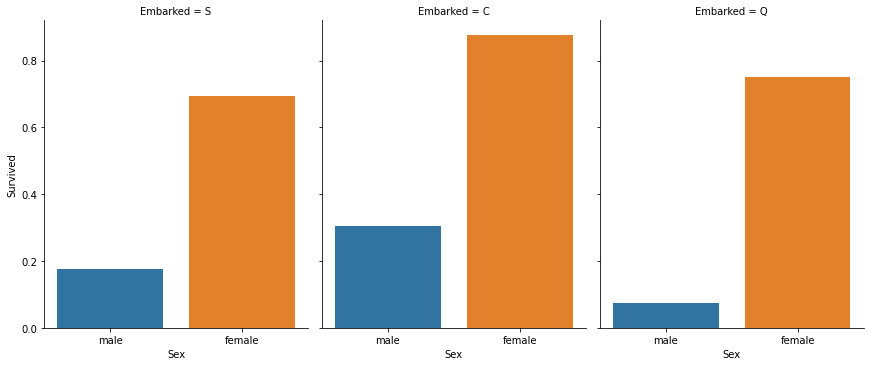

In [15]:
sns.catplot(data=train, x="Sex", y="Survived", col="Embarked", kind="bar", ci=None, aspect=0.8)

### Summary based on visuals
Probability of surviving was the most with:  


*   Passengers who were **Young.**  
*   Passengers who paid **more Fare.**
*   Passengers who were **Female**.
*   Passengers who had **Passenger Class as 1**.
*   Passenger who boarded at **Cherbourg**.

![](https://upload.wikimedia.org/wikipedia/commons/3/33/Titanic_sinking_gif.gif)

## Efficient Method

In [16]:
train = pd.read_csv(r"D:\Study\Trimester 8\DWDM\Mini Project\train.csv")
print("\nFresh training data")
display(train)


Fresh training data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
numerical = ['Pclass','Age','SibSp','Parch','Fare']
categorical = ['Sex', 'Embarked']

features = numerical + categorical
target = ['Survived']

print('\nFeatures:', features, '\nTarget:', target)


Features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'] 
Target: ['Survived']


In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(train[features], np.ravel(train[target]), 
                                                      test_size=0.2, random_state=42)

# Numerical Column Transformer
numerical_transformer = Pipeline(
    steps=[('iterative', IterativeImputer(max_iter = 10, random_state=0)),
           ('scaler', StandardScaler())])

# Categorical Column Transformer
categorical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')),
           ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Performing transformations
preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, numerical),
                  ('cat', categorical_transformer, categorical)])

# Main pipeline
model = LogisticRegression()
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('iterative',
                                                                   IterativeImputer(random_state=0)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown

### <center>Visualising Pipeline</center>  
![Pipeline Visualization](Pipeline.png)

### Testing different algorithms and recording observations

In [20]:
observations = pd.DataFrame()

classifiers = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 
               'RandomForestClassifier', 'AdaBoostClassifier',
               'KNeighborsClassifier']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          KNeighborsClassifier()
         ]

for m, c in zip(models, classifiers):
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', m)])
    observations[c] = (cross_val_score(pipe, X_train, y_train, scoring='accuracy', cv=cv))

In [21]:
mean = pd.DataFrame(observations.mean(), index = classifiers)
observations = pd.concat([observations, mean.T])
observations.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
print("Observations for 5 fold Cross Validation")
observations.T.sort_values(by=['Mean'], ascending = False)

Observations for 5 fold Cross Validation


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
Radial SVM,0.783217,0.853147,0.859155,0.816901,0.830986,0.828681
LogisticRegression,0.748252,0.846154,0.830986,0.781690,0.823944,0.806205
AdaBoostClassifier,0.769231,0.853147,0.802817,0.809859,0.795775,0.806166
RandomForestClassifier,0.776224,0.776224,0.823944,0.838028,0.781690,0.799222
Linear SVM,0.727273,0.811189,0.823944,0.802817,0.781690,0.789382
KNeighborsClassifier,0.734266,0.825175,0.816901,0.774648,0.795775,0.789353


In [22]:
best_model = svm.SVC(kernel='rbf')

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('best_model', best_model)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_valid)

Text(154.4666666666667, 0.5, 'predicted label')

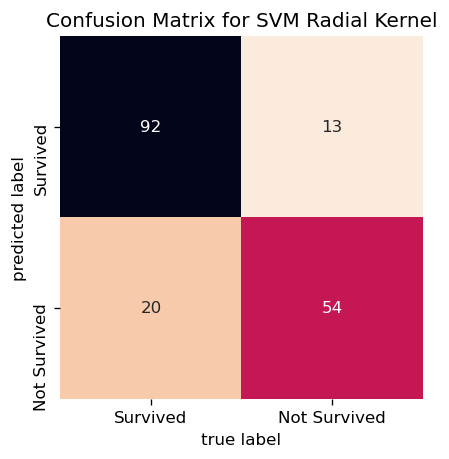

In [23]:
cm = confusion_matrix(y_valid, y_pred)

plt.figure(dpi=120)

labels = ["Survived", "Not Survived"]

sns.heatmap(cm, annot=True, cmap='rocket_r', cbar=False, square=True,
            xticklabels=labels, yticklabels=labels).set_title("Confusion Matrix for SVM Radial Kernel")

plt.xlabel('true label')
plt.ylabel('predicted label')

In [24]:
print(classification_report(y_valid, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Survived       0.82      0.88      0.85       105
Not Survived       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



![](https://i.pinimg.com/originals/e7/b4/ec/e7b4ec0021fea9952695a580d0ed5c39.gif)